# How to calculate Daniel and Weber roughness from .wav file 
## (amplitude-modulated tone)

MoSQITo is a unified and modular development framework of key sound quality metrics favoring reproducible science and efficient shared scripting among engineers, teachers and researchers community.

This tutorial explains how to calculate the acoustic roughness (Daniel and Weber method) of an amplitude modulated tone from a .wav file

In [1]:
# Add MoSQITo to the Python path
import sys
sys.path.append('..')

# Import useful packages
import math
import numpy as np
import matplotlib.pyplot as plt

# Import MoSQITo modules
from mosqito.functions.shared.load import load
from mosqito.functions.roughness_danielweber.comp_roughness import comp_roughness

For this tutorial, the test signal .wav file has been generated using the "test_signal_generation" script.
According to the roughness definition, an amplitude-modulated tone with a carrier frequency of 1 kHz and a modulation frequency of 70 Hz at a level of 60 dB should correspond to a roughness of 1 asper for a modulation depth of 1. 

The signal is loaded using the "load" function which takes 3 parameters:
 - The signal type as a boolean: *True since the signal is stationary*
 - The path to the .wav signal file: *The file belongs to the "tests/roughness/data/Sounds" folder*
 - A calibration factor for the signal to be in Pa: *A value of 2√2 corresponds test signal generation process*

Signal resampled to 48 kHz to allow calculation.


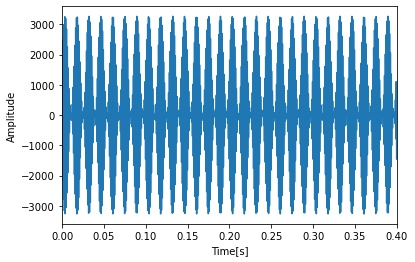

In [3]:
# Load signal and compute third-octave spectrum
signal, fs = load(True,'../mosqito/validations/roughness_danielweber/Sounds/Test_signal_fc1000_fmod70.wav', calib=2*2**0.5*(2 ** 15 - 1)) 

# Plot amplitude-modulated tone
time = np.linspace(0, len(signal)/fs, len(signal))
plt.plot(time, signal)
plt.xlim(0, 0.4) 
plt.xlabel("Time[s]")
plt.ylabel("Amplitude")
plt.show()

The function "comp_roughness" is then used with 3 parameters:
 - The signal values,
 - The sampling frequency,
 - An overlap proportion between 0 and 1.
 
The script calculates the roughness R in asper and also returns the time axis corresponding to the points of interests with the given overlapping proportion.

Roughness is being calculated


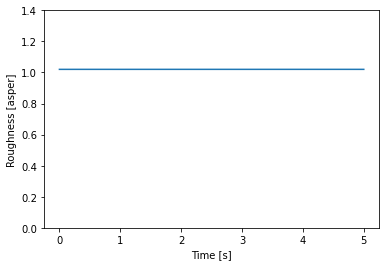

In [5]:
roughness = comp_roughness(signal, fs, overlap=0)

plt.plot(roughness['time'], roughness['values'])
plt.ylim(0, 1.4) 
plt.xlabel("Time [s]")
plt.ylabel("Roughness [asper]")
plt.show()